In [25]:
from montu import *
#from montu.__cycle_1 import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
mtime = MonTime('bce2501-01-01 12:00:00')
mtime = MonTime('2501 b.c.e. 01-01 12:00:00')
mtime = MonTime('-2500-01-01 12:00:00')
print(mtime)

Montu Time Object:
--------------------------
Date in proleptic UTC: -2500-01-01 12:00:00.0002
Date in mixed UTC: -2500-01-22 12:00:00
Date in SPICE format: 2501 B.C. 01-01 12:00:00.200
General:
    Components: [-1, 2500, 1, 1, 12, 0, 0, 200]
    Is bce: True
    Is Julian: True
Uniform scales:
    Terrestrial time:
        tt: -142006202700.3199
        jtd: 807954.69096852
    UTC time:
        et: -142006262399.99988
        jed: 807954.0
    Delta-t = TT - UTC = 59699.68000000001
Objects:
    Date in datetime64 format: -2500-01-01T12:00:00.000200
    Date in PyPlanet Epoch: 807954.0
    Date in PyEphem Epoch: -2501/1/22 12:00:00
    Date in AstroPy Time: 807954.69096852
Astronomical properties at Epoch:
    True obliquity of ecliptic: 23:58:33.587
    True nutation longitude: 00:00:10.214
    Greenwhich Meridian Sidereal Time: 18:40:25.323



In [27]:
Montu.load_kernels(PRECISION_KERNELS)

In [28]:
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)
mtime = MonTime('-2500-01-01 12:00:00')
mars = PlanetaryBody('Mars')

In [29]:
mars.calculate_sky_position(mtime,tebas)

Computing position of body 'mars' at epoch: jtd = 807954.69096852 
Method 'SPICE':
	Position Epoch: prolectic gregorian -2500-01-01 12:00:00.0002, JED = 807954.0
	Coordinates @ J2000: 
		Equatorial: 12:31:48.754 01:37:12.184
		Ecliptic: 186:39:46.949 04:38:36.308
	Coordinates @ Epoch : 
		Equatorial: 08:32:9.796 24:06:28.555
		Ecliptic: 124:21:21.542 04:39:5.339
	Observing conditions: 
		Distance to site [au]:  0.660450348835636
		Distance to sun [au]:  1.626114972997512
		Solar elongation [deg]:  157:49:18.876
		Phase angle [deg]:  13:21:31.981
		Magnitude:  -1.1
	Other properties: 
		Local true sidereal time:  20:52:25.323
		Hour angle @ Epoch:  12:20:15.527
		Local coordinates @ Epoch:  06:11:24.275 -41:38:31.094


In [30]:
mars.calculate_sky_position(mtime,tebas,method='all')

Computing position of body 'mars' at epoch: jtd = 807954.69096852 
Method 'Horizons':
	Position Epoch: prolectic gregorian -2500-01-01 12:00:00.0002, JED = 807954.0
	Coordinates @ J2000: 
		Equatorial: 12:31:49.147 01:37:6.708
		Ecliptic: 186:39:54.558 04:38:33.609
	Coordinates @ Epoch : 
		Equatorial: 08:32:9.283 24:06:29.556
		Ecliptic: 124:21:14.472 04:39:4.619
	Observing conditions: 
		Distance to site [au]:  0.66052182424896
		Distance to sun [au]:  1.626124866723
		Solar elongation [deg]:  157:47:51.000
		Phase angle [deg]:  13:22:14.880
		Magnitude:  -1.1
	Other properties: 
		Local true sidereal time:  20:52:25.323
		Hour angle @ Epoch:  12:20:16.054
		Local coordinates @ Epoch:  06:11:33.727 -41:38:29.317
Method 'VSOP87':
	Position Epoch: prolectic gregorian -2500-01-01 12:00:00.0002, JED = 807954.0
	Coordinates @ J2000: 
		Equatorial: 12:31:48.360 01:37:33.109
		Ecliptic: 186:39:33.205 04:38:53.193
	Coordinates @ Epoch : 
		Equatorial: 08:32:9.718 24:06:40.920
		Ecliptic: 124

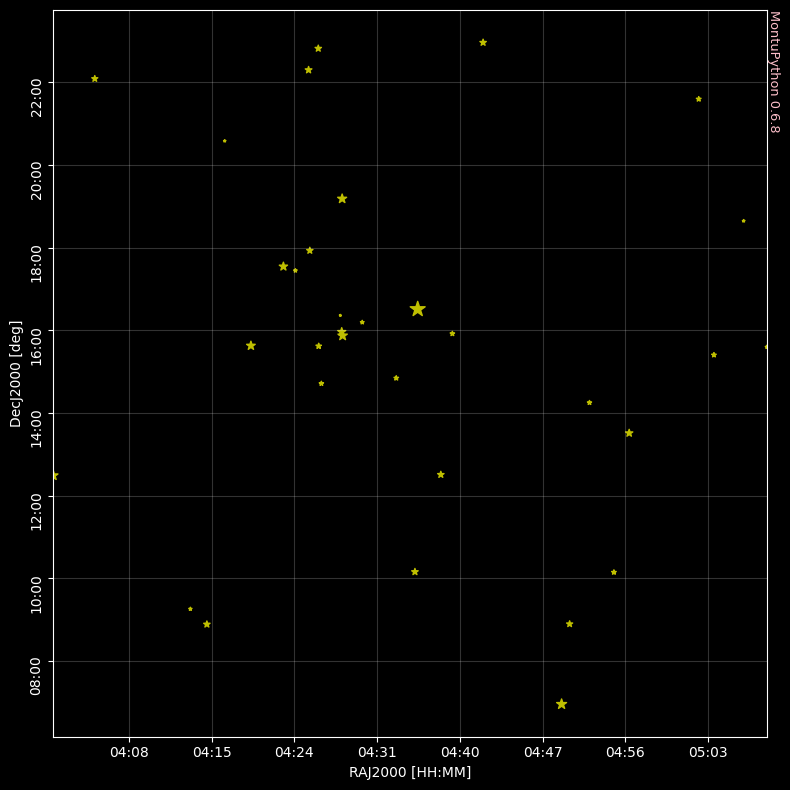

In [31]:
aldebaran = ALL_STARS.get_stars(ProperName='Aldebaran')
hyades = ALL_STARS.get_stars_area(RA=aldebaran.data.RAJ2000,Dec=aldebaran.data.DecJ2000,radius=10,Mag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=False,figargs=dict(figsize=(8,8)))
fig.savefig('gallery/hyades.png')

## Evolution of pole stars

In [8]:
# Montu packages and data
from montu import *

# These magic commands are intended to allow updating the packages if they change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Choose from database all bright stars that according to [wikipedia](https://en.wikipedia.org/wiki/Pole_star#Precession_of_the_equinoxes) were or will be close to the celestial North pole:

In [9]:
star_names = ('Polaris','Vega','Thuban','Deneb','Alderamin','Kochab')
stars = ALL_STARS.get_stars(ProperName=star_names)
stars.data

,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RAJ2000,DecJ2000,Distance,Mag,AbsMag,Spectrum,ColorIndex
8221,8222,11767,8890.0,424.0,NaN,1Alp UMi,Polaris,2.52974312000000001,89.26413804999999968,132.27513227513199467,1.96999999999999997,-3.63739102249396984,F7:Ib-IIv SB,0.63600000000000001
50003,50004,68756,123299.0,5291.0,NaN,11Alp Dra,Thuban,14.07317388999999963,64.37580873000000281,94.69696969696970257,3.66999999999999993,-1.21168040901103002,A0III SB,-0.04900000000000000
52553,52554,72607,131873.0,5563.0,NaN,7Bet UMi,Kochab,14.84510983000000017,74.15547596000000397,38.77471888328810223,2.06999999999999984,-0.87274328931031198,K4IIIvar,1.46500000000000008
65794,65795,91262,172167.0,7001.0,Gl 721,3Alp Lyr,Vega,18.61560722000000112,38.78299310999999960,7.75614674629643996,0.03000000000000000,0.58176991332001105,A0Vvar,-0.00100000000000000
74083,74084,102098,197345.0,7924.0,NaN,50Alp Cyg,Deneb,20.69053150999999957,45.28033423000000113,990.09900990099004048,1.25000000000000000,-8.72839313108677928,A2Ia,0.09200000000000000
76422,76423,105199,203280.0,8162.0,Gl 826,5Alp Cep,Alderamin,21.30960598000000061,62.58545528999999874,14.96110113704370015,2.45000000000000018,1.57518220610676996,A7IV-V,0.25700000000000001


Now precess the position of all stars from -20 000 to 20 000 years from 2000:

In [10]:
now = MonTime()
df = pd.DataFrame()
for dt in tqdm.tqdm(np.linspace(-20000*YEAR,20000*YEAR,1000)):
    past = now + dt
    pstars = SkyCoordinates.precess_coordinates(stars.data,past)

    row = dict(tt = past.tt)
    for star in star_names:
        row.update({star:float(pstars[pstars.ProperName == star].DecEpoch)})
    df = pd.concat([df,pd.DataFrame([row])])

100%|██████████| 1000/1000 [00:07<00:00, 132.48it/s]


Now plot declinations as a function of time:

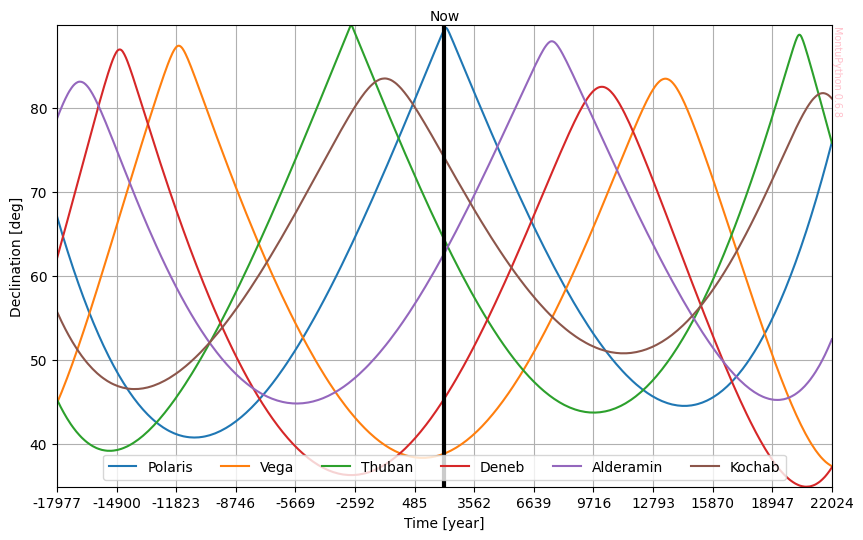

In [42]:
fig,ax = plt.subplots(figsize=(10,6))
for star in star_names:
    ax.plot(df['tt'],df[star],label=star)

ax.legend(loc='lower center',ncol=len(star_names))
ax.set_xlabel("Time [year]")
ax.set_ylabel("Declination [deg]")
ax.axvline(MonTime().tt,color='k',lw=3)
ax.text(0.5,1.01,'Now',ha='center',transform=ax.transAxes)
ax.margins(0)
ax.set_xticks(np.linspace(df['tt'].min(),df['tt'].max(),14))
ax.grid()
MonTime.set_time_ticks(ax)
Montu.montu_mark(ax)
fig.savefig('gallery/pole-stars.png')

Check date when star is close to the pole:

In [12]:
for star in star_names:
    imax = df[star].argmax()
    mtime = MonTime(df.iloc[imax].tt)
    print(f"Star {star} will be the closest to the pole at {mtime.datespice} (declination {D2H(df.iloc[imax][star])})")

Star Polaris will be the closest to the pole at 2083-11-07 23:27:23.4895 (declination 89:31:51.354)
Star Vega will be the closest to the pole at 11692 B.C. 10-12 08:22:01.527200 (declination 87:24:10.508)
Star Thuban will be the closest to the pole at 2803 B.C. 11-12 23:37:04.617900 (declination 89:54:19.214)
Star Deneb will be the closest to the pole at 14735 B.C. 08-30 11:42:18.980200 (declination 86:57:22.016)
Star Alderamin will be the closest to the pole at 7569-06-13 07:53:42.6437 (declination 87:55:56.040)
Star Kochab will be the closest to the pole at 1041 B.C. 08-30 22:56:24.100200 (declination 83:30:4.833)


In [ ]:
MonTime()

MonTime('2023-10-17 00:57:54.8065'/'2023-10-17 00:57:57')